In [31]:
# import necessary packages
import os, sys, glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.neighbors import NearestNeighbors
from scipy import ndimage

sys.path.append('../')

import utils.DistanceMap as DistanceMap

In [32]:
# specify paths to masks
mask_path = '../pennycress_pods/train/train_masks_by_pod/'

In [33]:
# load test image
mask = Image.open(mask_path + '8.tt8t x fc6-8.G.WBP-2022.W_0.png')
mask = np.array(mask) / 255.0

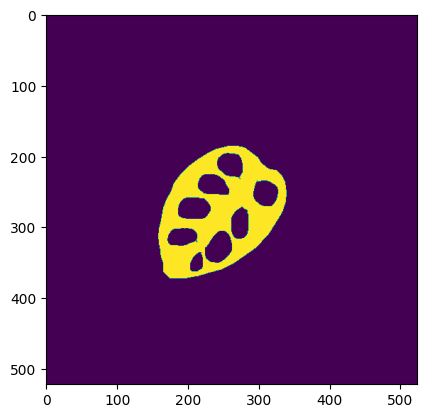

In [35]:
# options
border_val = 0.5 #seed/pod border px. take val. of 0.5

seed = mask[:, : , 2] > 0.5
env = mask[:, : , 1] > 0.5

plt.imshow(env)

In [45]:
weights.min(), weights.max()

(0.5, 1.0)

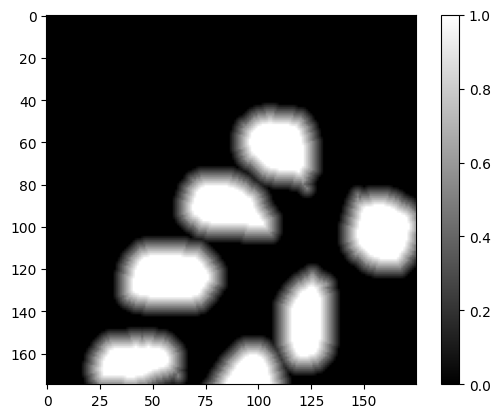

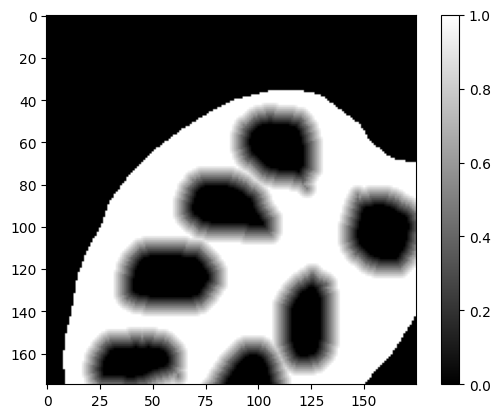

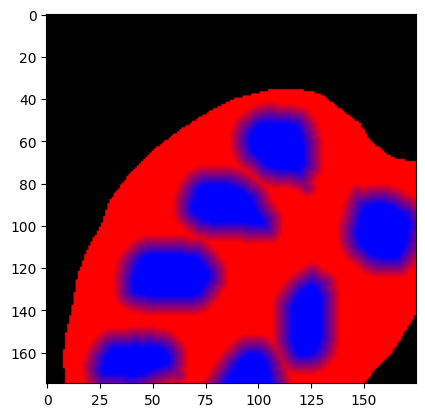

In [47]:


plt.imshow((weighted_seed)[150:325, 150:325], cmap = 'gray'); plt.colorbar(); plt.show()
plt.imshow((weighted_env)[150:325, 150:325], cmap = 'gray'); plt.colorbar(); plt.show()

rgb = np.zeros((weights.shape[0], weights.shape[1], 3))
rgb[:, :, 0], rgb[:, :, 2] = weighted_env, weighted_seed
plt.imshow(rgb[150:325, 150:325]); plt.show()